# Looking for Supermassive Black Hole Binaries in CRTS Data (Group 8)

Nicole Wallack, Joshua Zink-Duda, Valeria Olivares, and Bryan Sagredo

### The Catalina Real-Time Transient Survey

The Catalina Real-Time Transient Survey (CRTS) is a offshoot of the Catalina Sky Survey (CSS), a project focusing on the study of near-Earth objects. The CRTS piggybacks off of this survey, instead looking for transient objects in this CSS data. The CRTS covers 33,000 square degrees, with the three CSS telescopes- The Mt. Lemmon Survey 1.5m, Catalina Sky Survey 0.7m , and Siding Springs Survey 0.5m telescopes.

###Supermassive Black Hole Binaries 
Galaxy mergers occur as their dark matter halos assemble, these frequently happen and result in binary supermassive black holes (Milosavljevic & Merritt 2001). Subparsec supermassive black holes (SMBH) are very difficult to resolve, but can be detected through variability resulting from accretion disk perturbations or relativistic jets precession (Graham et al. 2015). Due to the fact that quasars are stochastic in the optical and variable across all wavelengths, periodocity in time series flux measurements are used to study binary SMBH. The presence of periodicity in these quasar light curves is indicative of binary SMBH.

###Analysis by AOV and Lomb-Scargle
Due to the fact that CRTS data is irregularly sampled as well as being noisy and having gaps, Fourier analyses are not applicable. Instead, we use analysis of variance (AOV) and Lomb-Scargle analyses to produce the periodograms for each time series flux measurement. The two resulting periodograms are convolved to produce an improved and less ambiguous solution.

In [79]:
#importing necessary packages
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
import pyaov
from astropy.io import ascii
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

We had a sample of 245,000+ quasar light curves. We looked for periodicity to determine if the light curves could belong to a binary SMBH. Using one as an example:

In [80]:
f = ascii.read('1146031039078.dat')
f0 = f[0][0]
for i in range(len(f)):
    f[i][0] = f[i][0] - f0
x = np.array(f['col1'])
y = np.array(f['col2'])
yerr = np.array(f['col3'])

We apply a 5th order polynomial fit to the data.

In [81]:
p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)

We clean-up the data by removing the data points that are greater than 5 sigma away from the best-fit curve. 

In [82]:
#Removing the extraneous data points
S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[]
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator.append(i)
y = np.delete(y,indicator)
x = np.delete(x,indicator)
yerr = np.delete(yerr,indicator)

Plotting the data (in blue), the 5th order polynomial fit (in red), and the 5-sigma curves (in green).

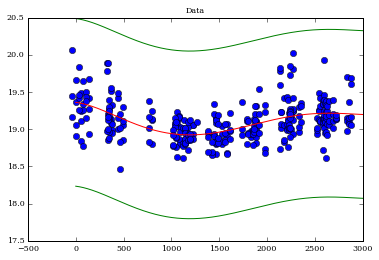

In [83]:
#plot data
plt.title("Data")
plt.plot(x, y, 'o',xp,p(xp),'r-',xp,p(xp)+5*sigma,'g-',xp,p(xp)-5*sigma,'g-')
plt.show()

We then calculate the Lomb-Scargle Periodogram. The Lomb-Scargle periodogram is a method of least-squares spectral analysis where the time delay is done to ensure orthogonality at a given time.

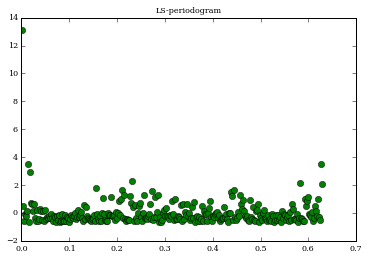

In [84]:
omega1 = 2 * np.pi / 3000
omega2 = 2 * np.pi / 10
omega = np.linspace(omega1,omega2,num=301)
#Calculate Lomb-Scargle Periodogram
PS = lomb_scargle(x, y, yerr, omega, generalized=True)

#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)

#Plot Lomb-Scargle Periodogram
plt.title("LS-periodogram")
plt.plot(omega,PS,'go')
plt.show()

We then calculate the AOV periodogram:

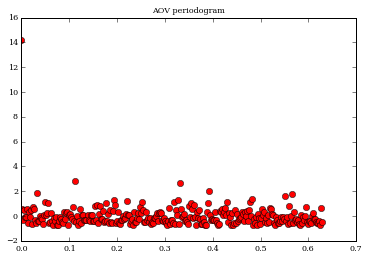

In [85]:
#To calculate the AOV Periodogram
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[-1],omega[0])

#normalize periodogram
th = (th - np.mean(th))/np.std(th)

#Plot AOV Periodogram
plt.title("AOV periodogram")
plt.plot(fr,th,'ro')
plt.show()

We convolve the Lomb-Scargle and AOV periodograms and find the peak:

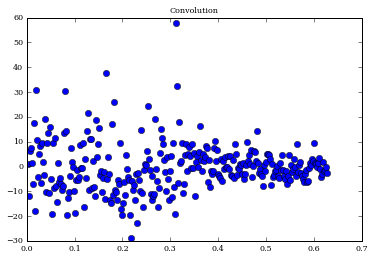

Number of standard deviations the peak is from the median =
6.0002891197


In [86]:

#plot convolution
conv = np.convolve(PS,th,mode='same')
plt.figure(4)
plt.title("Convolution")
plt.plot(omega,conv,'bo')
plt.show()
#Calculating the peak
peak = conv.max()
freq = conv.argmax()
std = np.std(conv)
u = np.median(conv)
sig = (peak-u)/std
print 'Number of standard deviations the peak is from the median ='
print sig

In order to ascertain the periodic nature of the data, we looked for high peaks in the data. Specifically, we looked at those light curves which had a peak a large number of standard deviations away. Out of the 245,000+ quasar light curves, ~2600 of them had peaks above 6 sigma from the median.

Looking at another light curve:

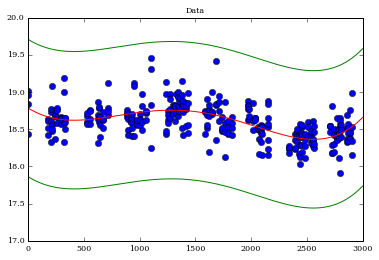

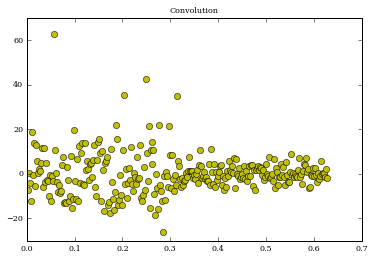

Number of standard deviations the peak is from the median =
7.00042562791


In [87]:
f = ascii.read('1143038053885.dat')
f0 = f[0][0]
for i in range(len(f)):
    f[i][0] = f[i][0] - f0
x = np.array(f['col1'])
y = np.array(f['col2'])
yerr = np.array(f['col3'])

omega1 = 2 * np.pi / 3000
omega2 = 2 * np.pi / 10
omega = np.linspace(omega1,omega2,num=301)
p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)
#Removing the extraneous data points
S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[]
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator.append(i)
y = np.delete(y,indicator)
x = np.delete(x,indicator)
yerr = np.delete(yerr,indicator)
#plot data
plt.figure(1)
plt.title("Data")
plt.plot(x, y, 'o',xp,p(xp),'r-',xp,p(xp)+5*sigma,'g-',xp,p(xp)-5*sigma,'g-')
#Calculate Lomb-Scargle Periodogram
PS = lomb_scargle(x, y, yerr, omega, generalized=True)
#To calculate the AOV Periodogram
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[-1],omega[0])
#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)
th = (th - np.mean(th))/np.std(th)
#plot convolution
conv = np.convolve(PS,th,mode='same')
plt.figure(4)
plt.title("Convolution")
plt.plot(omega,conv,'yo')
plt.show()
#Calculating the peak
peak = conv.max()
freq = conv.argmax()
std = np.std(conv)
u = np.median(conv)
sig = (peak-u)/std
print 'Number of standard deviations the peak is from the median ='
print sig

There were ~550 light curves with peaks at least 7 sigma away from the median.                                             There were 10, 11, and 12 sigma distance from the median peaks:

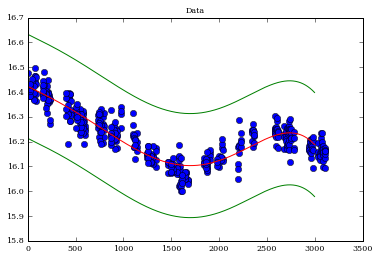

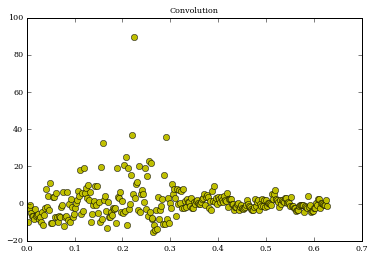

Number of standard deviations the peak is from the median =
10.0614354341


In [88]:
f = ascii.read('1001115060673.dat')
f0 = f[0][0]
for i in range(len(f)):
    f[i][0] = f[i][0] - f0
x = np.array(f['col1'])
y = np.array(f['col2'])
yerr = np.array(f['col3'])

omega1 = 2 * np.pi / 3000
omega2 = 2 * np.pi / 10
omega = np.linspace(omega1,omega2,num=301)
p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)
#Removing the extraneous data points
S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[]
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator.append(i)
y = np.delete(y,indicator)
x = np.delete(x,indicator)
yerr = np.delete(yerr,indicator)
#plot data
plt.figure(1)
plt.title("Data")
plt.plot(x, y, 'o',xp,p(xp),'r-',xp,p(xp)+5*sigma,'g-',xp,p(xp)-5*sigma,'g-')

#Calculate Lomb-Scargle Periodogram
PS = lomb_scargle(x, y, yerr, omega, generalized=True)

#To calculate the AOV Periodogram
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[-1],omega[0])

#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)
th = (th - np.mean(th))/np.std(th)

#plot convolution
conv = np.convolve(PS,th,mode='same')
plt.figure(4)
plt.title("Convolution")
plt.plot(omega,conv,'yo')
plt.show()
#Calculating the peak
peak = conv.max()
freq = conv.argmax()
std = np.std(conv)
u = np.median(conv)
sig = (peak-u)/std
print 'Number of standard deviations the peak is from the median ='
print sig

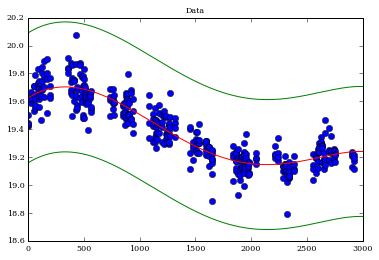

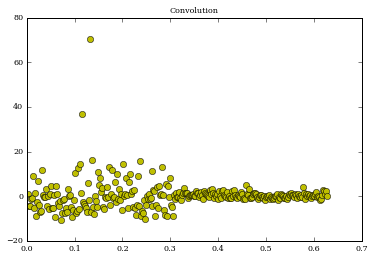

Number of standard deviations the peak is from the median =
11.1311542103


In [89]:
f = ascii.read('2121102018729.dat')
f0 = f[0][0]
for i in range(len(f)):
    f[i][0] = f[i][0] - f0
x = np.array(f['col1'])
y = np.array(f['col2'])
yerr = np.array(f['col3'])

omega1 = 2 * np.pi / 3000
omega2 = 2 * np.pi / 10
omega = np.linspace(omega1,omega2,num=301)
p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)
#Removing the extraneous data points
S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[]
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator.append(i)
y = np.delete(y,indicator)
x = np.delete(x,indicator)
yerr = np.delete(yerr,indicator)
#plot data
plt.figure(1)
plt.title("Data")
plt.plot(x, y, 'o',xp,p(xp),'r-',xp,p(xp)+5*sigma,'g-',xp,p(xp)-5*sigma,'g-')

#Calculate Lomb-Scargle Periodogram
PS = lomb_scargle(x, y, yerr, omega, generalized=True)

#To calculate the AOV Periodogram
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[-1],omega[0])

#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)
th = (th - np.mean(th))/np.std(th)

#plot convolution
conv = np.convolve(PS,th,mode='same')
plt.figure(4)
plt.title("Convolution")
plt.plot(omega,conv,'yo')
plt.show()
#Calculating the peak
peak = conv.max()
freq = conv.argmax()
std = np.std(conv)
u = np.median(conv)
sig = (peak-u)/std
print 'Number of standard deviations the peak is from the median ='
print sig

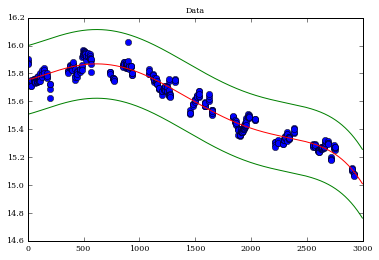

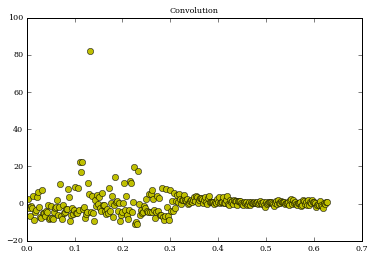

Number of standard deviations the peak is from the median =
12.0682077451


In [90]:
f = ascii.read('2121102009799.dat')
f0 = f[0][0]
for i in range(len(f)):
    f[i][0] = f[i][0] - f0
x = np.array(f['col1'])
y = np.array(f['col2'])
yerr = np.array(f['col3'])

omega1 = 2 * np.pi / 3000
omega2 = 2 * np.pi / 10
omega = np.linspace(omega1,omega2,num=301)
p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)
#Removing the extraneous data points

S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[]
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator.append(i)
y = np.delete(y,indicator)
x = np.delete(x,indicator)
yerr = np.delete(yerr,indicator)
#plot data
plt.figure(1)
plt.title("Data")
plt.plot(x, y, 'o',xp,p(xp),'r-',xp,p(xp)+5*sigma,'g-',xp,p(xp)-5*sigma,'g-')

#Calculate Lomb-Scargle Periodogram
PS = lomb_scargle(x, y, yerr, omega, generalized=True)

#To calculate the AOV Periodogram
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[-1],omega[0])

#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)
th = (th - np.mean(th))/np.std(th)

#plot convolution
conv = np.convolve(PS,th,mode='same')
plt.figure(4)
plt.title("Convolution")
plt.plot(omega,conv,'yo')
plt.show()
#Calculating the peak
peak = conv.max()
freq = conv.argmax()
std = np.std(conv)
u = np.median(conv)
sig = (peak-u)/std
print 'Number of standard deviations the peak is from the median ='
print sig

A visual inspection of the light curves does not immediately suggest the periodicity that the high sigma of the peaks of the convolutions does. This may suggest that our code produces false-positives. This may indicate the need to further limit other parameters to limit the number of false positives.